In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import griddata
from PIL import Image
import sys
from os import listdir
from os.path import isfile,join
from tqdm import tnrange
path="C:\\Users\\user\\Desktop\\data\\20190718_data\\"
savepath="C:\\Users\\user\\Desktop\\data\\result\\"
def import_image(path):
    imagp=[path+f for f in listdir(path) if isfile(join(path,f))]
    if path+'Thumbs.db' in imagp:
        imagp.remove(path+'Thumbs.db')
    imagp.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
    return imagp
def image_intensity_sweep(path,savepath,exptitle,area,bgarea,start,stop,res):
    imag=import_image(path)
    intensity=[]
    #print imag
    for i in imag:
        temp0=np.mean(Image.open(i).convert('L'))
        temp1=np.mean(Image.open(i).convert('L').crop(area))
        temp2=np.mean(Image.open(i).convert('L').crop(bgarea))
        intensity.append((temp0,temp1,temp2))
    intensity=np.array(intensity)
    #print max(intensity)
    dof=len(intensity)
    #x=np.arange(0.,interval*dof,interval)
    x=np.arange(start,stop,res) #내가 표시하고자 하는 res
    xdata=np.arange(start,stop,(stop-start)/dof) # 실제 res
    index=[0]
    for j in tnrange(len(x)):
        for i in range(len(xdata)-1):
            if(xdata[i]<=x[j] and xdata[i+1]>x[j]):
                index.append(i)
    nbin=int((stop-start)/res)
    fp=open(savepath+exptitle+'.txt','w')
    signal=np.array([np.mean(intensity.T[1][index[i]:index[i+1]+1]-intensity.T[2][index[i]:index[i+1]+1]) for i in range(nbin-1)])
    for i in range(len(signal)):
        fp.write('%f %f\n' % (x[i],signal[i]))
    fp.close()
image_intensity_sweep(path,savepath,"1.6~3.0MHz",(0,126,0+451,126+400),(620,0,620+57,0+400),1600,3000,1)

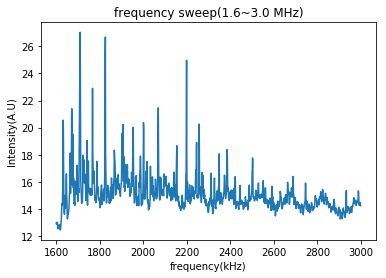

In [8]:
data=open(savepath+"1.6~3.0MHz.txt").read().split()
data=list(map(float,data))
xdata=[data[i] for i in range(0,len(data),2)]
ydata=[data[i] for i in range(1,len(data),2)]
plt.plot(xdata,ydata)
plt.title("frequency sweep(1.6~3.0 MHz)")
plt.xlabel("frequency(kHz)")
plt.ylabel("Intensity(A.U)")
plt.savefig(savepath+"1.6~3.0MHz.png",dpi=600)


In [9]:
print(len(xdata))

1399
